<a href="https://colab.research.google.com/github/daham-13/CM2604-Coursework/blob/main/CM2604_Coursework_2330906.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [11]:
#instal ucimlrepo library for fetching data
!pip install ucimlrepo

In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

In [19]:
import pandas as pd

# Combine X (features) and y (target) into one DataFrame
data = pd.concat([X, y], axis=1)

# Check the combined DataFrame
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  


# Data Preprocessing

### Data Overview

In [22]:
#Basic information of data

# General Information
print(data.info())  # Data types, non-null counts, and memory usage

# Summary Statistics
print(data.describe(include="all"))  # Summary for numerical and categorical columns

# Shape of the Data
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                 age          job  marital  education de

In [24]:
#Null values

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

missing_presentage = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values Percentage:\n", missing_presentage)

Missing Values:
 age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

Missing Values Percentage:
 age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64


In [25]:
#Duplicate Data

# Count Duplicate Rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


y
no     39922
yes     5289
Name: count, dtype: int64


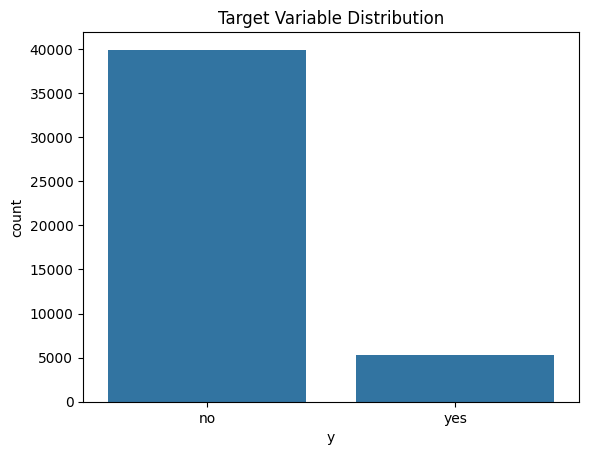

In [30]:
#Target Value Distribution

# Unique Value Counts
print(data["y"].value_counts())

# Visualize Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x="y")
plt.title("Target Variable Distribution")
plt.show()


Numerical Columns:
 Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')
                age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  


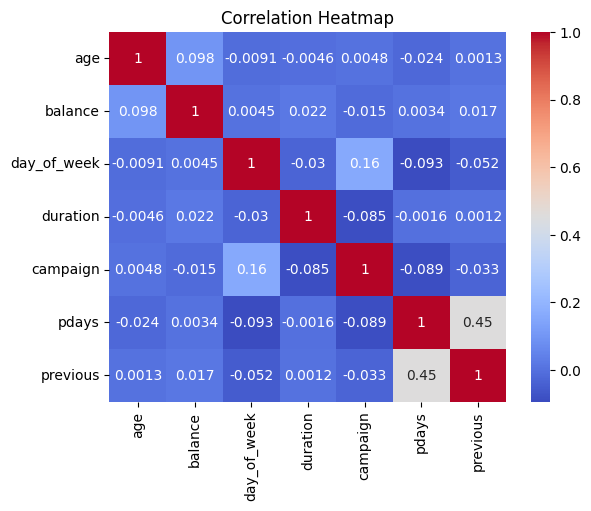

In [34]:
#Feature Analization

# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:\n", numerical_columns)

# Summary Statistics
print(data[numerical_columns].describe())

# Correlation Heatmap
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [43]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=["object", "category"]).columns
print("Categorical Columns:\n", categorical_columns)

# Unique values and frequency
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts())
    print("\n")


Categorical Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
job: 11 unique values
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64


marital: 3 unique values
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


education: 3 unique values
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64


default: 2 unique values
default
no     44396
yes      815
Name: count, dtype: int64


housing: 2 unique values
housing
yes    25130
no     20081
Name: count, dtype: int64


loan: 2 unique values
loan
no     37967
yes     7244
Name: count, dtype: int64


contact: 2 unique values
contact
cellular     29285
tel

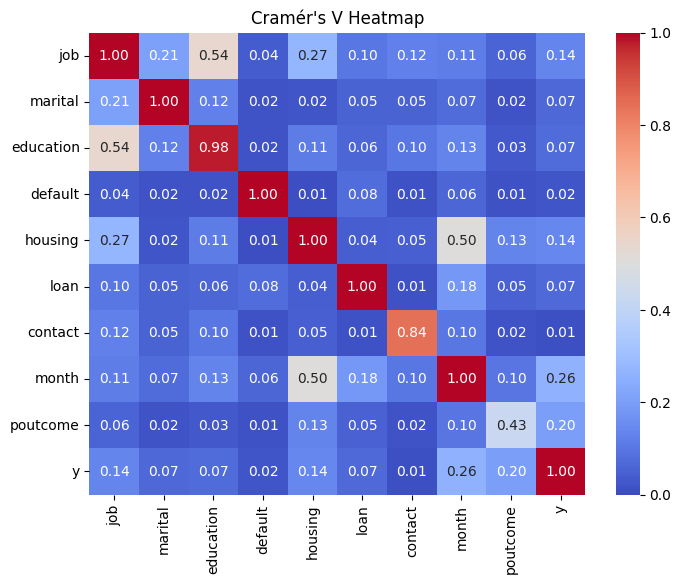

In [46]:
#Cramér's V correlation for categorical variables
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate C
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return np.sqrt(chi2 / (len(x) * (min(contingency_table.shape) - 1)))

# Create an empty correlation matrix
corr_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                           columns=categorical_columns, index=categorical_columns)

# Fill the correlation matrix with Cramér's V values
for i in range(len(categorical_columns)):
    for j in range(i, len(categorical_columns)):
        corr_matrix.iloc[i, j] = cramers_v(data[categorical_columns[i]], data[categorical_columns[j]])
        corr_matrix.iloc[j, i] = corr_matrix.iloc[i, j]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.show()


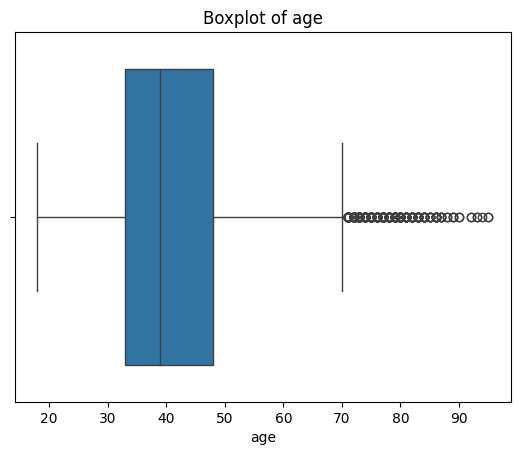

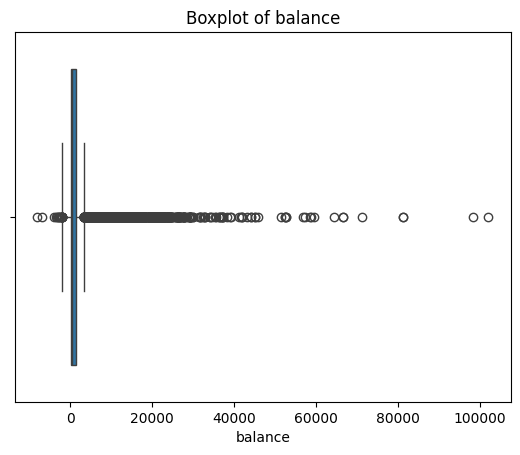

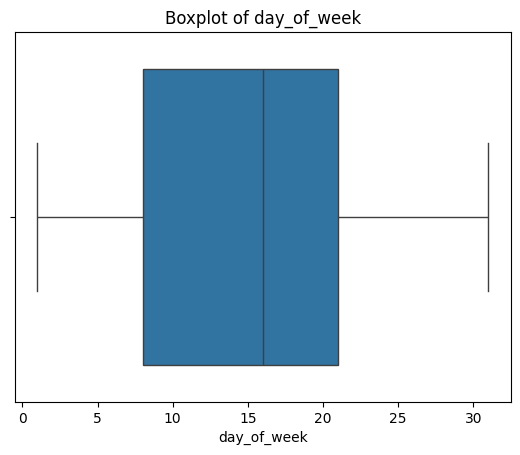

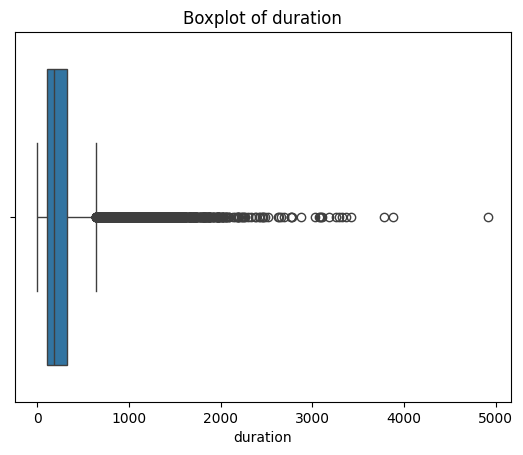

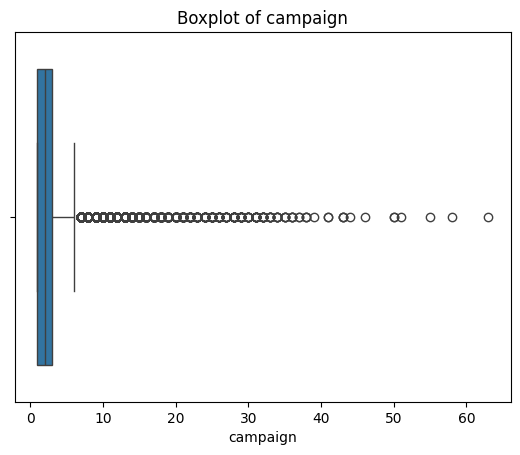

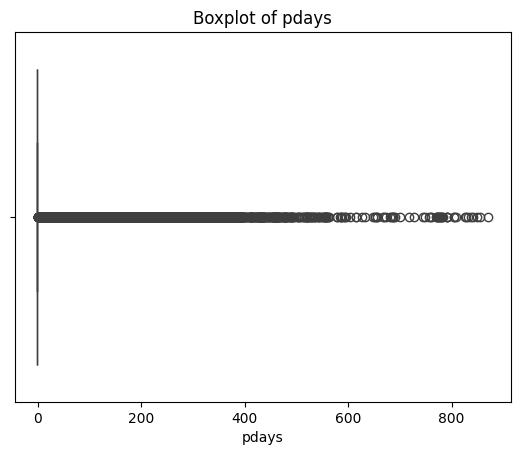

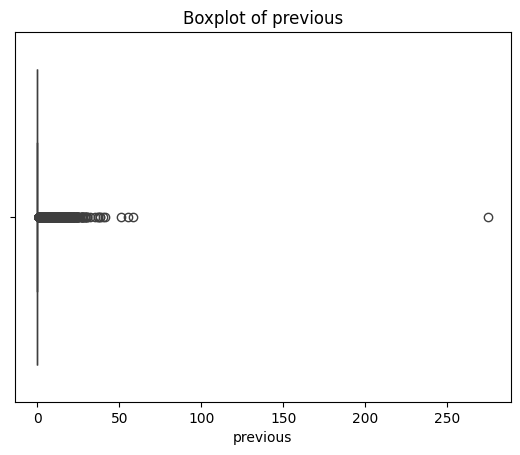

In [47]:
#Identifying Outliers

for col in numerical_columns:
  sns.boxplot(data=data, x=col)
  plt.title(f"Boxplot of {col}")
  plt.show()

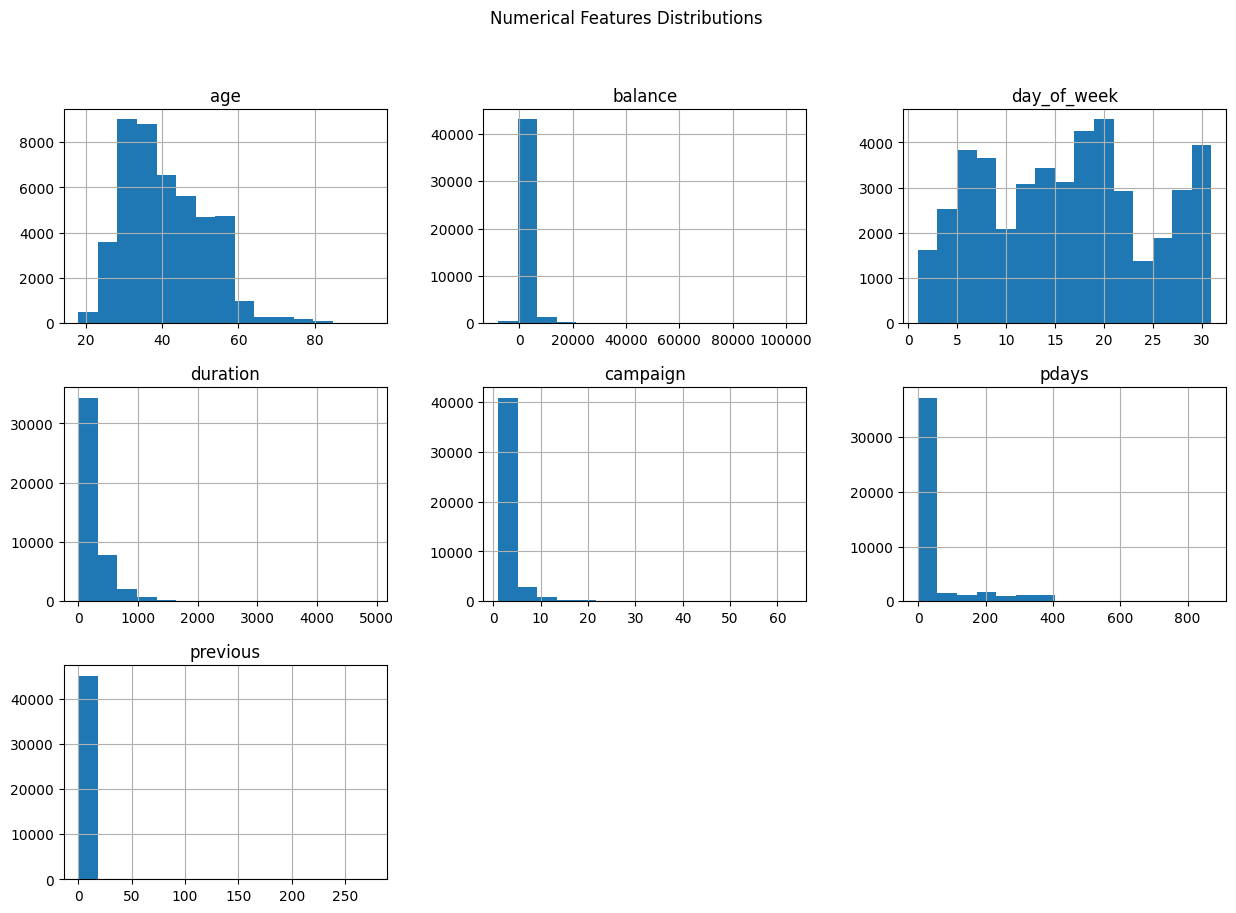

In [50]:
#Visualize Feature Distributions

# Histogram for numerical columns
data[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle("Numerical Features Distributions")
plt.show()


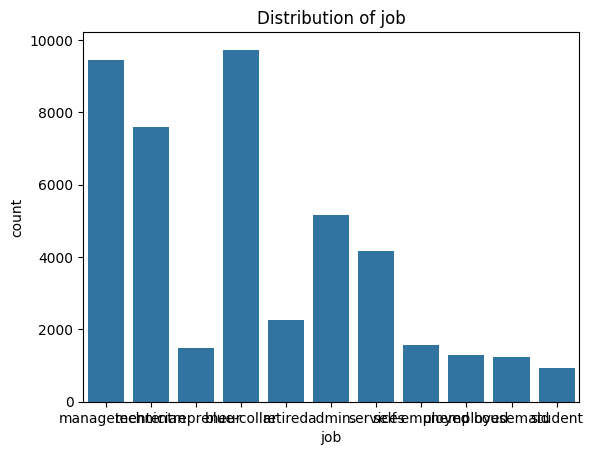

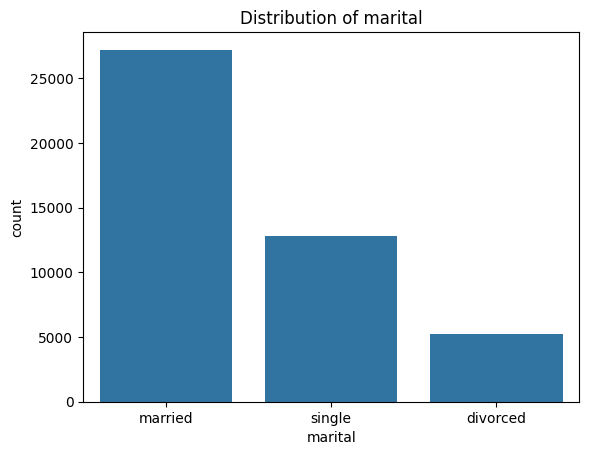

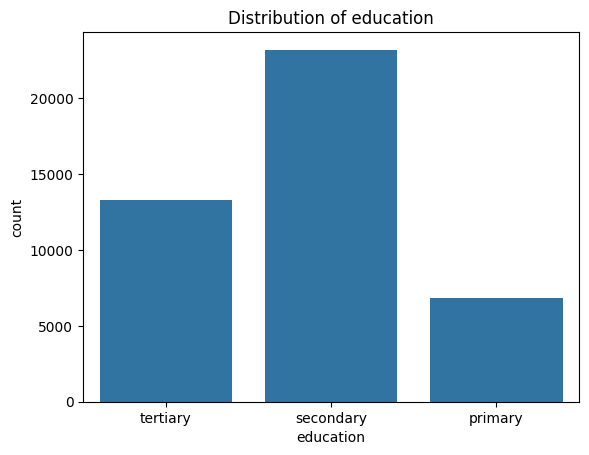

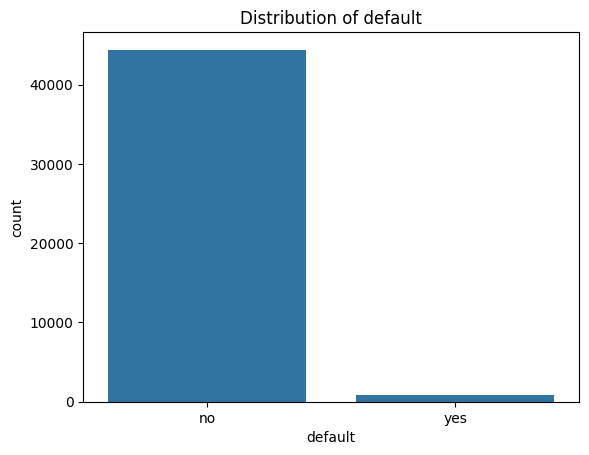

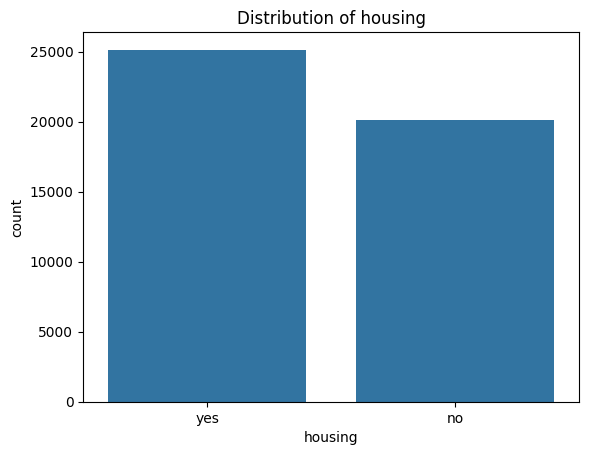

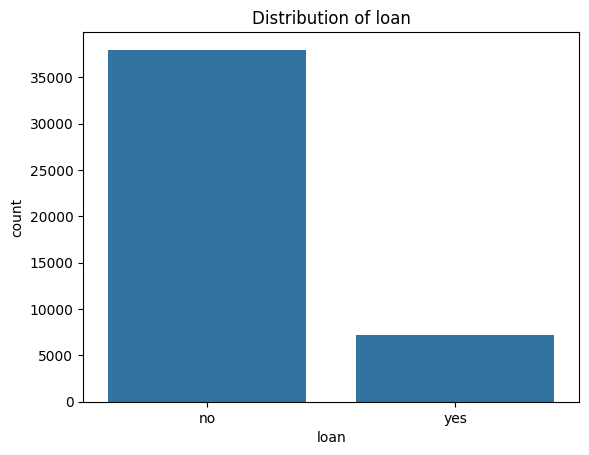

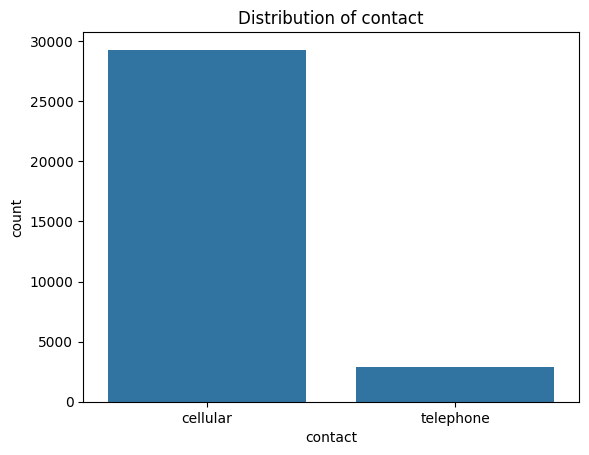

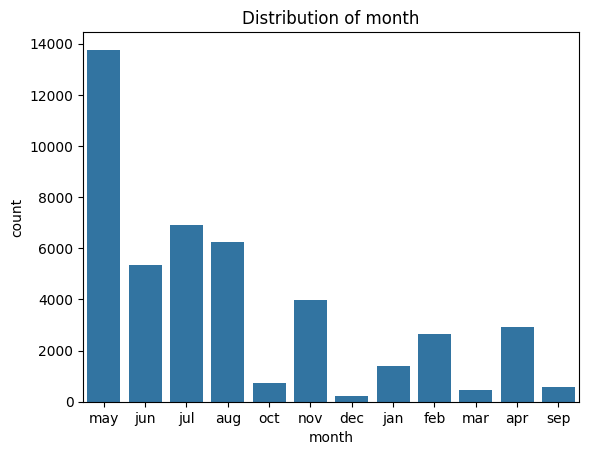

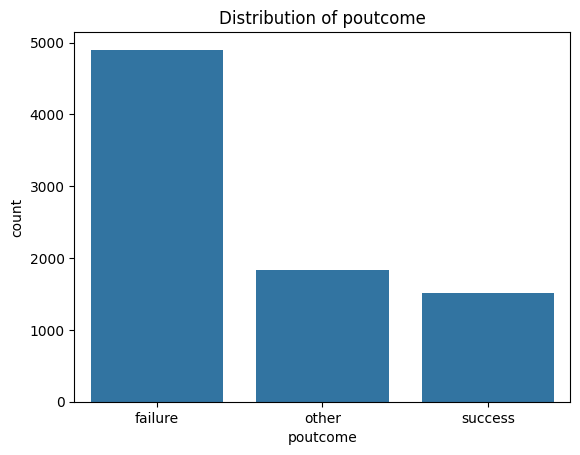

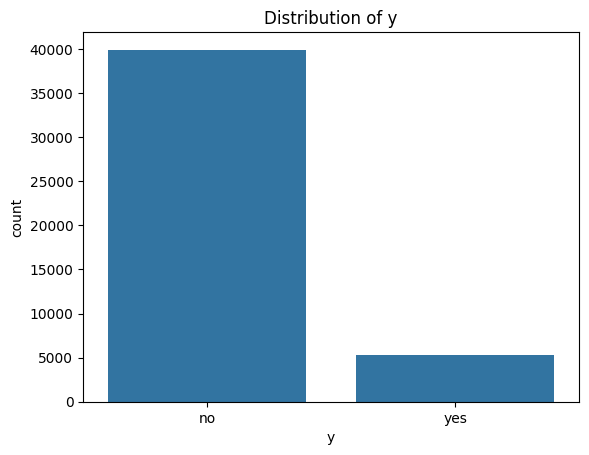

In [54]:
# Bar plots for categorical columns
for col in categorical_columns:
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

In [57]:
# Imbalance Ratio
class_distribution = data["y"].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)


Class Distribution (%):
 y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64
